In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
y = iris.target
X = iris.data #作为数组，X是几维?
X.shape #作为数据表或特征矩阵，X是几维? 
import pandas as pd 
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#调用PCA
pca = PCA(n_components=2)
pca = pca.fit(X)

X_dr = pca.transform(X)
X_dr

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

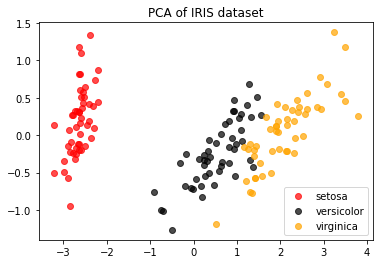

In [4]:
X_dr[y == 0, 0]
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_dr[y == i, 0]
                ,X_dr[y == i, 1]
                ,alpha=.7
                ,c=colors[i]
                ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [5]:
#属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小(可解释性方差的大小) 
pca.explained_variance_
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比 #又叫做可解释方差贡献率
pca.explained_variance_ratio_
#大部分信息都被有效地集中在了第一个特征上
pca.explained_variance_ratio_.sum()

0.9776852063187949

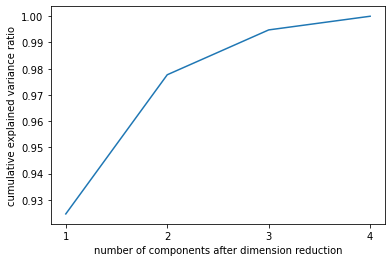

In [6]:
import numpy as np

pca_line = PCA().fit(X) 
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_)) 

plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数

plt.xlabel("number of components after dimension reduction") 
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [7]:
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle

#可以发现，mle为我们自动选择了3个特征
pca_mle.explained_variance_ratio_.sum() 
#得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量
#并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化

0.9947878161267246

In [8]:
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [9]:
PCA(2).fit(X).components_
PCA(2).fit(X).components_.shape

(2, 4)

In [10]:
# 需要联网
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

faces = fetch_lfw_people(min_faces_per_person=60) 

In [11]:
faces.images.shape

faces.data.shape
 
X = faces.data

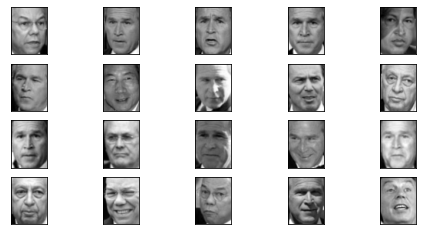

In [20]:
#数据本身是图像，和数据本身只是数字，使用的可视化方法不同
#创建画布和子图对象
fig, axes = plt.subplots(4,5,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
#不要显示坐标轴
fig
axes

# axes中的一个对象对应fig中的一个空格 
# 如果要在每一个子图对象中填充图像(共24张图)，需要写一个在子图对象中遍历的循环
axes.shape
'''
二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的三个图
另一种是把数据拉成一维，循环一次只生成一个图
选择哪种循环方式，取决于图像需要存储在怎样的结构中
使用子图对象.imshow 来将图像填充到空白画布上
但imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
所以需要遍历的是faces.images，其结构是(1277, 62, 47)
要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
因此需要将axes的结构拉成一维来循环
'''
axes.flat

enumerate(axes.flat)
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] ,cmap="gray")
#选择色彩的模式

In [21]:
# 降到150维 
pca = PCA(150).fit(X)
V = pca.components_
V.shape

(150, 2914)

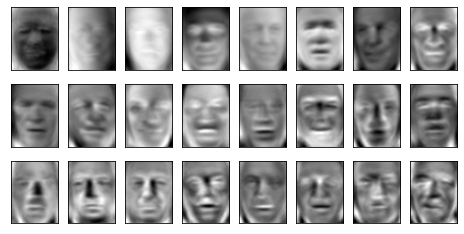

In [22]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")

In [23]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [25]:
faces = fetch_lfw_people(min_faces_per_person=60)

faces.images.shape
# 怎样理解这个数据的维度?
faces.data.shape
# 换成特征矩阵之后，这个矩阵是什么样? 
X = faces.data

(1348, 2914)

In [26]:
# 建模降维，获取降维后的特征矩阵X_dr
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

In [27]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape

(1348, 2914)

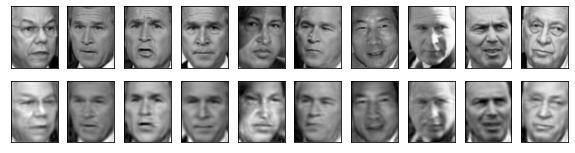

In [32]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                       ,subplot_kw={"xticks":[],"yticks":[]}
                      )
# 和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中 
# 那在这里，我们使用怎样的循环? 
# 现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据 
# 所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平

for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

# 案例1

In [33]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [34]:
digits = load_digits()
digits.data.shape

(1797, 64)

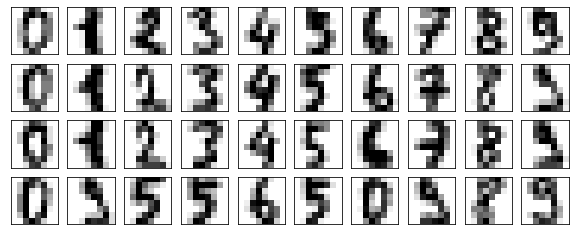

In [35]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4)
                            ,subplot_kw = {"xticks":[],"yticks":[]}
                            )
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
plot_digits(digits.data)

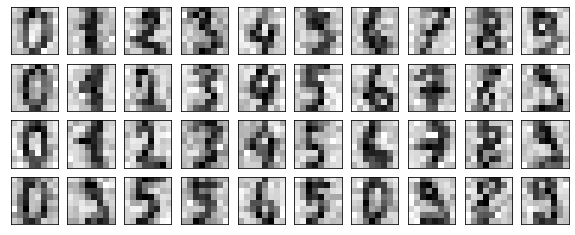

In [36]:
np.random.RandomState(42)
#在指定的数据集中，随机抽取服从正态分布的数据 
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差 
noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [37]:
# 降维
pca = PCA(0.5).fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

(1797, 6)

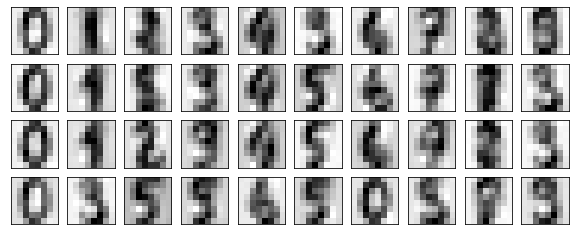

In [38]:
# 降噪
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)

# 案例2

In [39]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [40]:
# 探索数据
data = pd.read_csv(r"/Users/zhboat/Desktop/Machine Learning/digit recognizor.csv")
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape

(42000, 784)

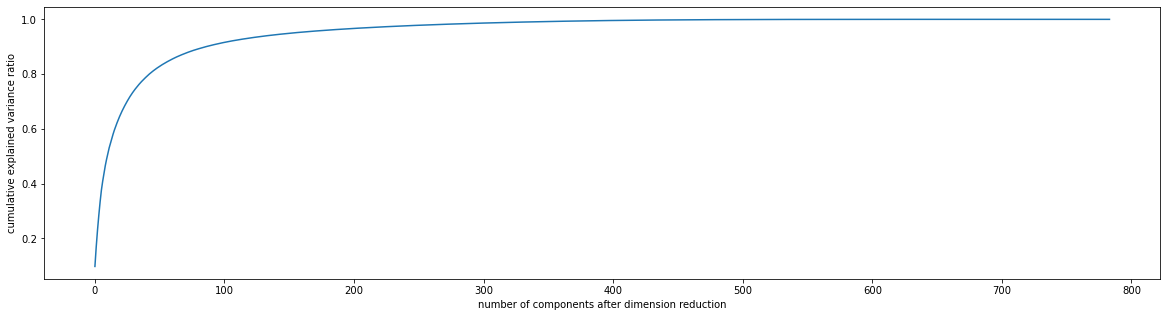

In [41]:
# 画累计方差贡献率曲线，找最佳降维后维度的范围
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

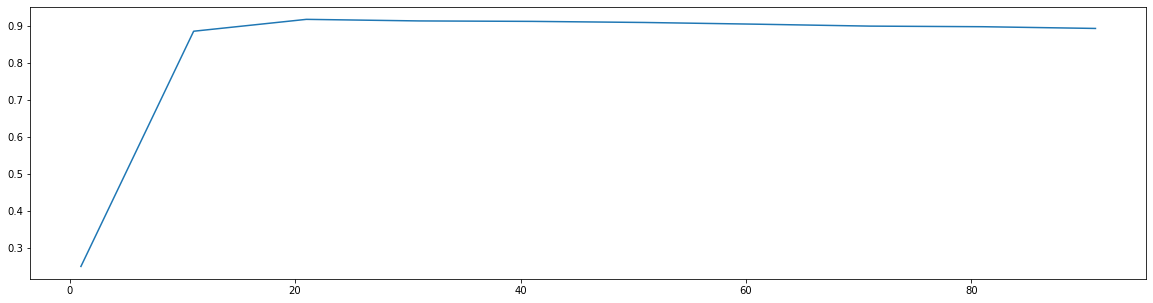

In [42]:
# 降维后维度的学习曲线，继续缩小最佳维度的范围
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

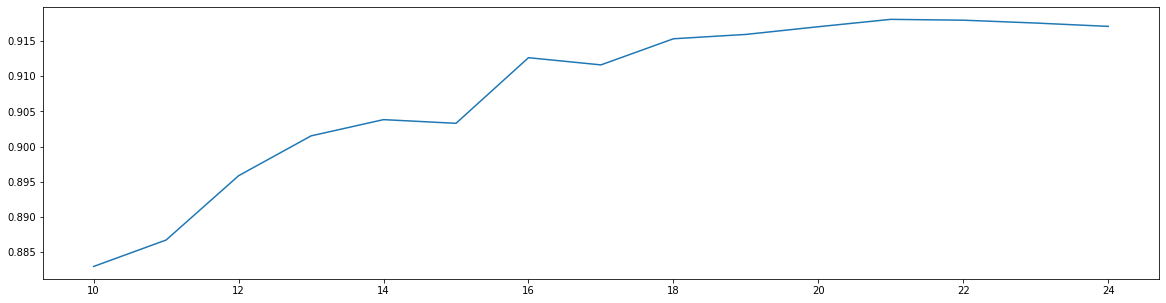

In [43]:
# 细化学习曲线，找出降维后的最佳维度
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [44]:
# 导入最佳维度进行降维，查看模型
X_dr = PCA(23).fit_transform(X)

cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()
# 模型94.55%

0.9455476190476191

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
# 使用knn方差提升准确性
cross_val_score(KNN(),X_dr,y,cv=5).mean()
# 经过knn达到96.99%

0.9699047619047618

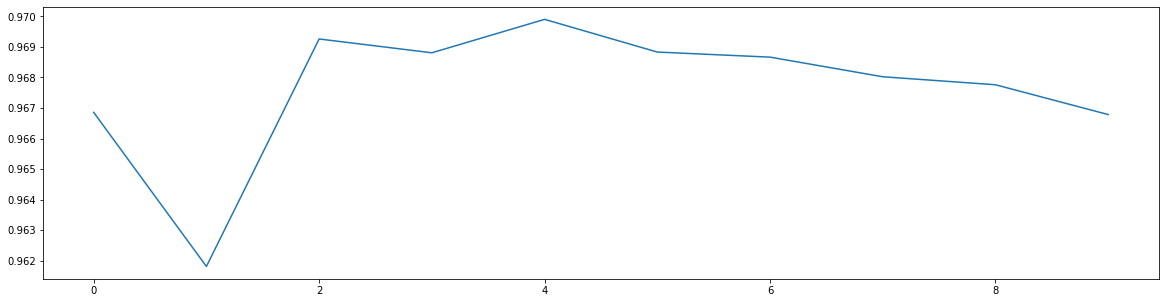

In [46]:
# k值学习曲线
score = []
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [47]:
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

0.9690238095238095

In [48]:
%%timeit
cross_val_score(KNN(4),X_dr,y,cv=5).mean()

42.3 s ± 319 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
